# Collect and Analyze a Twitter Network
[Effrosyni Simou](http://lts4.epfl.ch/simou), *PhD Student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

# Objective of Exercise
The aim of this exercise is to learn how to create your own, real network using data collected from the Internet and then to discover some properties of the collected network. 

# Resources
You might want to have a look at the following resources before starting:

* [Twitter REST API](https://dev.twitter.com/rest/public)
* [Tweepy Documentation](http://tweepy.readthedocs.io/en/v3.5.0/)
* [Tutorial "Mining Twitter data with Python"](https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/)

# 1. Collect a Twitter Network

In order to collect data from Twitter you will need to generate access tokens.  To do this you will need to register a [client application with Twitter](https://apps.twitter.com/). Once you are done you should have your tokens. You can now create a `credentials.ini` file as follows:
```
[twitter]
consumer_key = YOUR-CONSUMER-KEY
consumer_secret = YOUR-CONSUMER-SECRET
access_token = YOUR-ACCESS-TOKEN
access_secret = YOUR-ACCESS-SECRET
```
In this way you will have this information readily available to you. 

In [1]:
%matplotlib inline

import random
import configparser
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import tweepy  # you will need to install tweepy first

In [2]:
# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('../Demos/TwitterDataAcquisition/credentials.ini')

#authentication
auth = tweepy.OAuthHandler(credentials.get('twitter', 'consumer_key'), credentials.get('twitter', 'consumer_secret'))
auth.set_access_token(credentials.get('twitter', 'access_token'), credentials.get('twitter', 'access_secret'))

#construct API instance
#deal with rate limits and notify when delayed because of rate limits
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

/home/chi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: You passed a bytestring as `filenames`. This will not work on Python 3. Use `cp.read_file()` or switch to using Unicode strings across the board.
  This is separate from the ipykernel package so we can avoid doing imports until


Now you are all set up to start collecting data from Twitter! 

In this exercise we will construct a network with the following logic:

1) We will chose a `user_id` in Twitter to be our first node. 

2) We will find (some) of the users who are both following `user_id` and are being followed by `user_id`. From now on we will call such users "connections" of `user_id`. We will place these user ids in a list called `first_nodes`. 

3) For every node in the list `first_nodes` we will then find (some) of the users who are following and are being followed by this node (aka the connections of this node). The user ids collected in this step will be placed in a list called `second_nodes`.

4) The collection of the ids of all nodes (aka Twitter users) that we have collected so far will be placed in a list called `all_nodes`.

5) Since we have only collected a subset of all possible "connections" for our nodes we have to check if there are any remaining inner connections that we have missed.

The entire network is to be organized in a dictionary with entries that will have as key the Twitter id of the user (this is a number characterizing each user in Twitter) and as value the list of ids of his connections.

So, let us begin. The first thing that you will have to do is to chose the node from which everything will start. I have chosen the Twitter account of [Applied Machine Learning Days](https://www.appliedmldays.org) that will take place in January 2018 in EPFL. You may change that if you wish to, but please make sure that the user you chose has both followers and friends and that he allows you to access this data.

In [3]:
user = 'appliedmldays '
user_id=api.get_user(user).id

In the following cell write a function that takes as an argument the Twitter id of a user and returns a list with the **ids** of his connections. Take into account the case where a user does not allow you to access this information.

**Reminder:** By connections we mean users that are both followers and friends of a given user.

In [4]:
def find_connections(user_id):
    followers = api.followers_ids(user_id)
    friends = api.friends_ids(user_id)
    connections = []
    for f in followers:
        if f in friends:
            connections.append(f)
    return connections

In [5]:
first_connections=find_connections(user_id)
print('{}has {} connections'.format(user, len(first_connections)))

appliedmldays has 139 connections


Collect your `first_nodes` and `second_nodes` and organize your collected nodes and their connections in the dictionary called `network`.

Hints:
* Use `random.choice([1,3,4])` to randomly choose a number in `[1, 3, 4]`.
* Use the `append` and `remove` methods to add and remove an element from a Python list.
* The `pop` method removes the last item in the list.

In [6]:
network={}
first_nodes=[]
second_nodes=[]
how_many=12#This is the number of connections you are sampling. 
          #Keep small (e.g.3) for development, larger later (e.g. 10)
#your code here
first_nodes = random.sample((first_connections),how_many)
for nid in first_nodes:
    connections=find_connections(nid)
    if len(connections) > how_many:
        new_nodes  = random.sample((connections),how_many)
    else:
        new_nodes= []
    network[nid] = list(set(new_nodes + [user_id]))
    for f in first_nodes:
        if f in connections and not(f in new_nodes):
            network[nid] += [f]
    second_nodes.extend(new_nodes)
second_nodes=list(set(second_nodes))
for nid in second_nodes:
        if nid in (first_nodes + [user_id]):
            second_nodes.remove(nid)

**Be careful!** You should only keep a small value for the `how_many` parameter while you are developing your code. In order to answer to the questions you should raise the value of this parameter to `how_many=10` at least. This will take a while to execute because of the API rate limit (plan your time accordingly). You should also remember to submit your jupyter notebook with the **output shown for a large value of the `how_many` parameter**. 

In [7]:
network[user_id] = first_nodes

In [8]:
pprint(network)

{34566614: [20522624,
            812226048356188160,
            39505635,
            24133893,
            750518582761680896,
            18869153,
            3662072362,
            46683981,
            17061491,
            379884632,
            33007738,
            79809418,
            763052115392593920],
 123969580: [812337101702393856,
             763052115392593920,
             841408947009515522,
             2201147526,
             2784120137,
             3065917227,
             2805995374,
             457409104,
             77540948,
             2614934260,
             25478329,
             2730064916,
             2885870877],
 140856473: [871273766827028480,
             831243221665714177,
             167943459,
             763052115392593920,
             840419880,
             330391433,
             14778542,
             82965309,
             253764020,
             1853880823,
             3842221403,
             552983932,
             4299008

In [9]:
all_nodes = [user_id] + first_nodes + second_nodes #your code here

In [10]:
print('There are {} first hop nodes'.format(len(first_nodes)))
print('There are {} second hop nodes'.format(len(second_nodes)))
print('There are overall {} nodes in the collected network'.format(len(all_nodes)))

There are 12 first hop nodes
There are 119 second hop nodes
There are overall 132 nodes in the collected network


In [11]:
for i in second_nodes:
    network[i]=[]

Find the inner connections between your collected nodes that you might have missed because you sampled the connections.

In [13]:
for i in range(0,len(all_nodes)):
    # your code here
    for j in range(i+1,len(all_nodes)):
        if all_nodes[i] in network[all_nodes[j]]:
            if not (all_nodes[j] in network[all_nodes[i]]):
                network[all_nodes[i]].extend([all_nodes[j]])
        elif all_nodes[j] in network[all_nodes[i]]:
            if not (all_nodes[i] in network[all_nodes[j]]):
                network[all_nodes[j]].extend([all_nodes[i]])
        else:
            try:
                status = api.show_friendship(source_id=all_nodes[i],target_id=all_nodes[j])
            except tweepy.TweepError as e:
                print "Ids {} and {} raised the TweepError:".format(all_nodes[i],all_nodes[j])
                print(e)
            else:
                if status[0].following and status[1].following:
                    network[all_nodes[j]].extend([all_nodes[i]])
                    if not (all_nodes[j] in network[all_nodes[i]]):
                        network[all_nodes[i]].extend([all_nodes[j]])

Rate limit reached. Sleeping for: 851
Rate limit reached. Sleeping for: 854
Rate limit reached. Sleeping for: 853
Rate limit reached. Sleeping for: 852
Rate limit reached. Sleeping for: 850
Rate limit reached. Sleeping for: 852
Rate limit reached. Sleeping for: 848
Rate limit reached. Sleeping for: 853
Rate limit reached. Sleeping for: 851
Rate limit reached. Sleeping for: 851
Rate limit reached. Sleeping for: 850
Rate limit reached. Sleeping for: 843
Rate limit reached. Sleeping for: 853
Rate limit reached. Sleeping for: 837
Rate limit reached. Sleeping for: 853
Rate limit reached. Sleeping for: 852
Ids 205867569 and 57927080 raised the TweepError:
Not authorized.
Rate limit reached. Sleeping for: 854
Rate limit reached. Sleeping for: 847
Rate limit reached. Sleeping for: 851
Rate limit reached. Sleeping for: 850
Rate limit reached. Sleeping for: 853
Rate limit reached. Sleeping for: 844
Rate limit reached. Sleeping for: 847
Rate limit reached. Sleeping for: 845
Rate limit reached. Sl

# 2. Discover some of the properties of the collected network

## 2.1 Adjacency matrix

Congradulations! You have now created a dictionary that describes a real Twitter network!
We now want to transform this dictionary into the adjacency (or weight) matrix that you learned about in your first class. 

In [14]:
W=np.zeros([len(all_nodes),len(all_nodes)], dtype=int)

In [15]:
# your code here
for i in range(0,len(all_nodes)):
    for j in range(i+1,len(all_nodes)):
        if all_nodes[j] in network[all_nodes[i]]:
            W[i,j] = 1
            W[j,i] = 1

Remember that a weight matrix should be symmetric. Check if it is:

In [16]:
np.nonzero(W-W.transpose())

(array([], dtype=int64), array([], dtype=int64))

**Question 1:**
It might happen that $W \neq W^{T} $ for some $(i,j)$. Explain why this might be the case.

**Your answer here:** That shouldn't happen. If it does the programmer probably made a mistake somewhere.

Impose your weight matrix to be symmetric.

In [17]:
# Make W is symmetric
bigger = W.transpose() > W

In [18]:
W = W - W*bigger + W.transpose()*bigger

Plot the weight matrix of your collected network.

Hint: use `plt.spy()` to visualize a matrix.

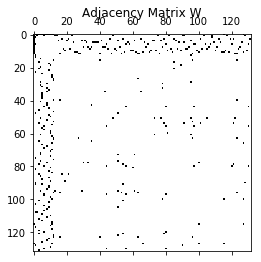

In [19]:
# your code here
plt.spy(W)
plt.title('Adjacency Matrix W')

In [39]:
L = 0
for n in all_nodes:
    L += len(network[n])
L = L/2
print L

185


**Question 2:**
What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your collected network)? How many links $L$ are there in your collected network? Comment on how $L$ and $L_{max}$ compare.

**Your answer here:** The maximum number of links $L_{max} = N(N-1)/2$, which would correspond to an all-to-all connected network. $L_{max} \neq N^2$ because we consider that a node can not be connected to itself and the connection from node A to node B is the same as the connection from node B to node A. For N=132, $L_{max} = 8646$. In our case L = 185, which is much less than $L_{max}$. This means that our network is relatively sparsely connected.

## 2.2 Degrees distribution

Plot a histogram of the degree distribution. 

In [20]:
p = np.zeros([len(all_nodes),1])# your code here
for i in range(0,len(all_nodes)):
    p[i] = len(network[all_nodes[i]])

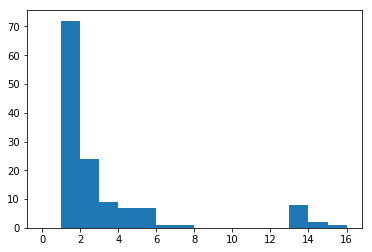

In [65]:
plt.hist(p,bins=int(p.max()+1),range=(0,p.max()+1));

**Question 3:** Comment on the plot. What do you observe? Would you expect a similar degree disribution in the complete Twitter network?

**Your answer here:** We can observe some type of power law distribution for degrees from 1 to 7. This type of distribution is also what one would expect for the complete Twitter network except that the degrees would become much greater of course. The interesting part of our histogram is for degrees from 13 to 15. One can observe a small island of distribution around these values, which can be attributed to how we chose to sample the Twitter network. The reason for this is that we sampled 12 connections from the account of Applied Machine Learning Days and 12 more from each of these, which means that all first nodes would have at least 13 connections. This resulted in the observed island of distribution around degrees of 13 and would likely not be present in the complete Twitter network.

## 2.3 Average degree

Calculate the average degree of your collected network.

In [66]:
d_avg = np.mean(p)# your code here
print d_avg

2.80303030303


## 2.4 Diameter of the collected network

**Question 4:** What is the diameter of the collected network? Please justify.

**Your answer here:** The diameter of this collected network will almost allways be 4, because the connectivity is very sparse, which means that the shortest path between many pairs of secondary nodes will have to pass by the "Applied Machine Learning Days" node and two of the "first_nodes".

## 2.5 Pruning the collected network

You might notice that some nodes have very few connections and hence our matrix is very sparse. Prune the collected network so that you keep only the nodes that have a degree that is greater than the average degree and plot the new adjacency matrix.

In [67]:
Wpruned = W # your code here
indexes = [True] * len(W)
for i in range(0,len(W)):
    indexes[i] = (sum(W[i])<=d_avg)

for i in range(len(W)-1,0,-1):
    if indexes[i]:
        Wpruned=np.delete(Wpruned,i,0)
        Wpruned=np.delete(Wpruned,i,1)        

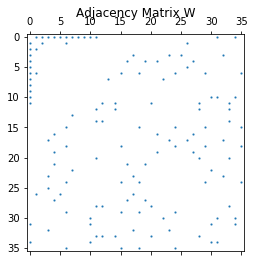

In [68]:
plt.spy(Wpruned, markersize=1)
plt.title('Adjacency Matrix W');